# **Data Exploration**

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load dataset Iris dari sklearn
IRIS = load_iris()
df = pd.DataFrame(data=IRIS.data, columns=IRIS.feature_names)

# Tambahkan kolom ID species (1,2,3) dan nama species
df['species'] = IRIS.target + 1
df['species_name'] = df['species'].map({1:'setosa', 2:'versicolor', 3:'virginica'})

# Tambahkan nomor baris mulai dari 1
df.insert(0, 'No', range(1, len(df)+1))

## **1. Statistik Deskriptif**

Statistik deskriptif ini menampilkan nilai rata-rata, standar deviasi, min, max, dan kuartil untuk semua fitur numerik pada dataset Iris.

In [2]:
print("Statistik Deskriptif Semua Fitur Numerik:")
display(df.describe().round(1))

Statistik Deskriptif Semua Fitur Numerik:


,No,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.0,150.0,150.0,150.0,150.0,150.0
mean,75.5,5.8,3.1,3.8,1.2,2.0
std,43.4,0.8,0.4,1.8,0.8,0.8
min,1.0,4.3,2.0,1.0,0.1,1.0
25%,38.2,5.1,2.8,1.6,0.3,1.0
50%,75.5,5.8,3.0,4.4,1.3,2.0
75%,112.8,6.4,3.3,5.1,1.8,3.0
max,150.0,7.9,4.4,6.9,2.5,3.0


## **2. Distribusi Tiap Fitur**

Berikut adalah histogram untuk masing-masing fitur numerik. KDE digunakan untuk melihat distribusi kemungkinan data secara lebih smooth.


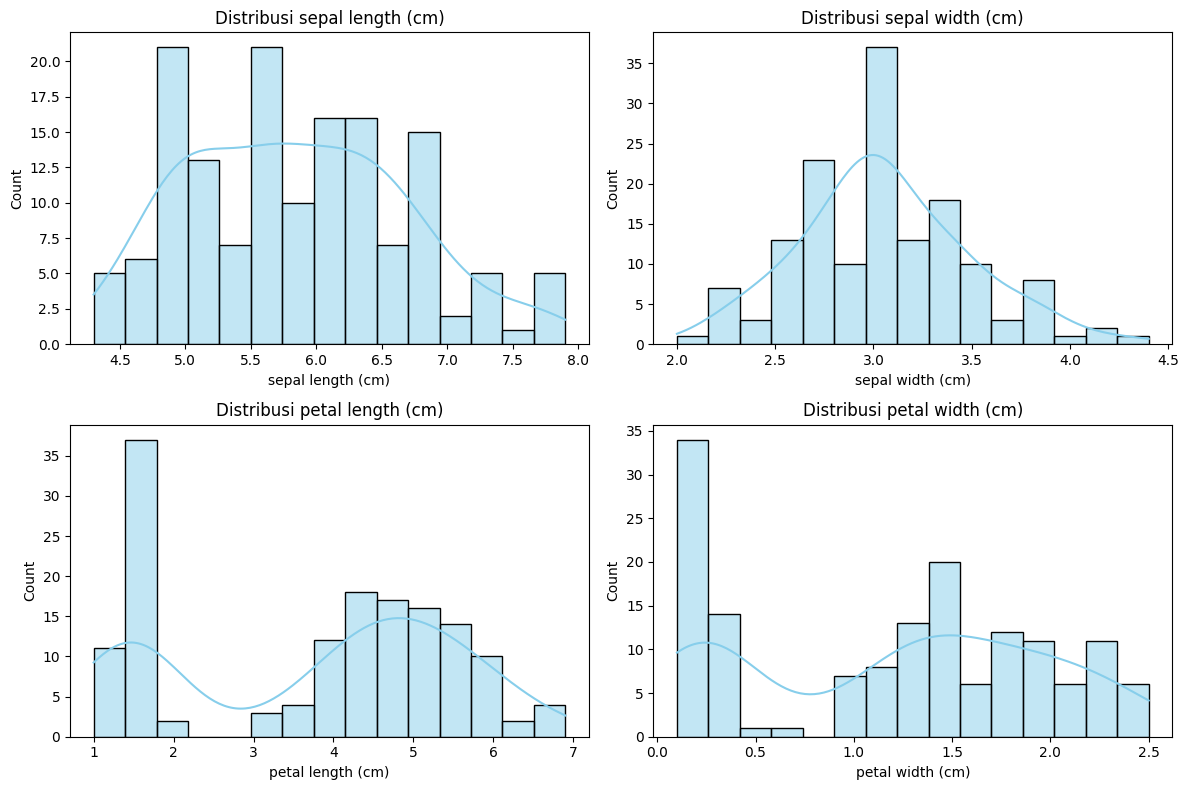

In [3]:
numeric_cols = IRIS.feature_names  # ['sepal length (cm)', 'sepal width (cm)', ...]

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

### **Keterangan Histogram Fitur Numerik :**

1. **Sepal Length (cm)**

- Distribusi relatif mendekati normal, meski sedikit condong ke kanan (*positively skewed*).
- Sebagian besar nilai berada di kisaran **5.0 – 6.5 cm**.
- Ada variasi cukup besar, menandakan fitur ini bisa membantu membedakan spesies.

2. **Sepal Width (cm)**

- Distribusinya relatif **simetris** dan mendekati ***normal distribution***.
- Nilai terbanyak sekitar 2.8 – 3.2 cm.
- Ada beberapa nilai ekstrem (**outlier**), terutama di bagian **bawah** (< 2.5 cm) dan **atas** (> 3.8 cm).

3. **Petal Length (cm)**

- Distribusi menunjukkan pola multimodal (lebih dari satu puncak).
- Menandakan perbedaan antar kelas spesies yang jelas.
- Kelompok pertama (sekitar 1.5 cm) merepresentasikan Setosa, sedangkan kelompok kedua (4 – 6 cm) merepresentasikan Versicolor dan Virginica.

4. **Petal Width (cm)**

- Sama seperti petal length, distribusi juga terlihat multimodal.
- Nilai kecil (~0.2 cm) khas untuk **Setosa**, sedangkan nilai lebih besar (1.0 – 2.0 cm) khas untuk **Versicolor** dan **Virginica**.
- Distribusi ini memperlihatkan fitur petal width sangat diskriminatif dalam membedakan spesies.

### **Ringkasan:**

- Fitur sepal **(length & width)** memberikan informasi, tetapi distribusinya lebih overlapped antar spesies.
- Fitur petal **(length & width)** jauh lebih baik untuk memisahkan spesies, terlihat dari distribusi multimodal yang jelas.

## **3. Korelasi Antar Fitur**



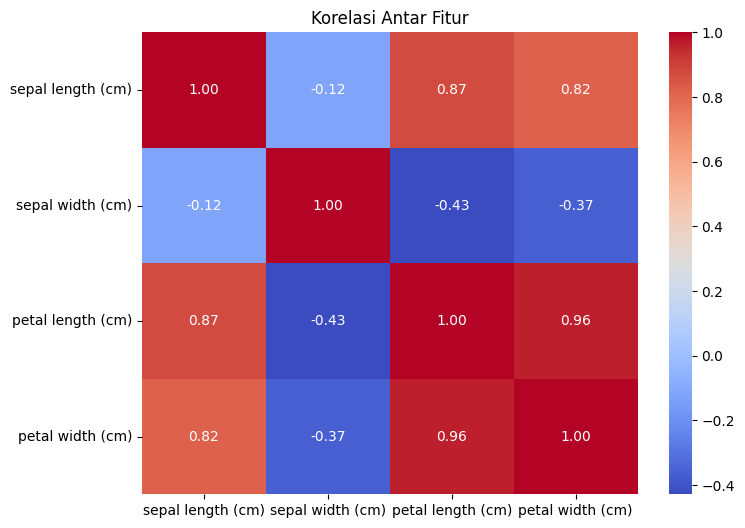

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Fitur")
plt.show()

### **Hubungan antar fitur :**

- **Sepal Length vs Petal Length (0.87)**
Korelasi positif yang sangat kuat. Semakin panjang sepal, umumnya semakin panjang petalnya.

- **Sepal Length vs Petal Width (0.82)**
Korelasi positif yang kuat. Sepal yang lebih panjang cenderung diikuti oleh petal yang lebih lebar.

- **Petal Length vs Petal Width (0.96)**
Korelasi positif yang sangat tinggi (mendekati 1). Artinya, panjang dan lebar petal hampir selalu bertambah secara bersamaan.

- **Sepal Width vs Petal Length (-0.43) dan Sepal Width vs Petal Width (-0.37)**
Korelasi negatif sedang. Artinya, sepal yang lebih lebar cenderung memiliki petal yang lebih pendek dan sempit.

- **Sepal Length vs Sepal Width (-0.12)**
Korelasi hampir nol (sangat lemah). Panjang sepal tidak banyak berhubungan dengan lebar sepal.

### **Kesimpulan :**

- Fitur **petal length** dan petal width memiliki hubungan yang sangat kuat, sehingga bisa menjadi indikator terbaik dalam klasifikasi spesies.
- Fitur **sepal width** justru kurang berkorelasi dengan fitur lain, sehingga kontribusinya mungkin lebih rendah dalam pemisahan kelas.

## **4. Scatterplot Petal**

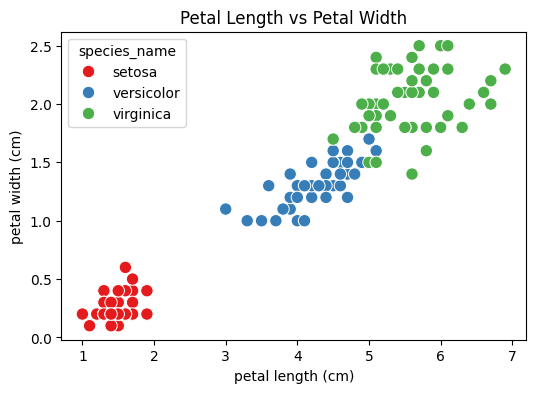

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', 
                hue='species_name', data=df, palette='Set1', s=80)
plt.title("Petal Length vs Petal Width")
plt.show()

### **Penjelasan Gambar**

- **Setosa (merah)** terlihat sangat terpisah dengan nilai petal length dan petal width yang rendah.
- **Versicolor (biru)** dan **Virginica (hijau)** memiliki sebaran yang lebih berdekatan, tetapi masih dapat dipisahkan karena Virginica cenderung memiliki petal lebih panjang dan lebar.
- Variabel **Petal Length** dan **Petal Width** membedakan kelas (species), khususnya dalam membedakan Setosa dari dua spesies lainnya.
- Ini menegaskan bahwa kombinasi fitur petal merupakan predictor yang kuat untuk klasifikasi pada dataset Iris.

## **5. Scatterplot Sepal**

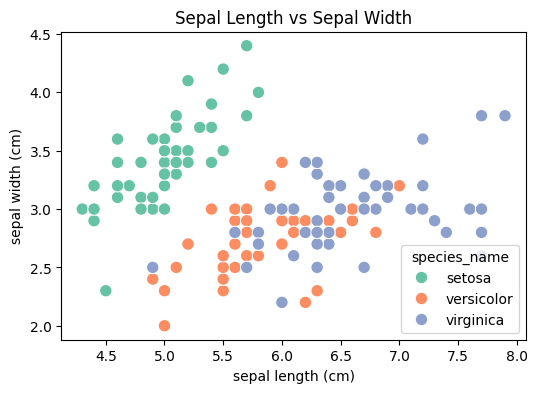

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='species_name', data=df, palette='Set2', s=80)
plt.title("Sepal Length vs Sepal Width")
plt.show()

### **Analisis Scatterplot Sepal :**

1. **Setosa (hijau)**
Terlihat terpisah cukup jelas dari dua spesies lain. Setosa cenderung memiliki sepal yang **lebih pendek** (4.5–5.5 cm) namun **lebih lebar** (3.0–4.5 cm).

2. **Versicolor (oranye)**
Memiliki distribusi di tengah-tengah. Sepal versicolor umumnya panjang 5.0–7.0 cm dengan lebar sekitar 2.0–3.5 cm. Ada sedikit **tumpang tindih** dengan **Virginica**.

3. **Virginica (biru)**
Cenderung memiliki sepal yang **lebih panjang** (6.0–8.0 cm) dan lebar 2.5–3.5 cm. Walaupun cenderung lebih panjang, rentangnya **tumpang tindih** dengan **Versicolor**.

### **Kesimpulan**

- **Setosa** dapat dibedakan dengan cukup jelas dari Versicolor dan Virginica menggunakan kombinasi panjang & lebar sepal.
- **Versicolor** dan Virginica saling tumpang tindih, sehingga sulit dipisahkan hanya dengan sepal.
- Sehingga, fitur sepal saja kurang cukup untuk memisahkan semua kelas; fitur petal lebih berperan penting dalam klasifikasi.

## **6. Countplot Jumlah Tiap Species**

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_18540\2297075918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species_name', data=df, palette='pastel')


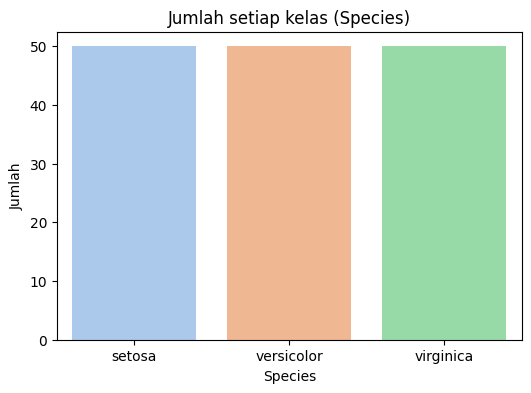

In [7]:
plt.figure(figsize=(6,4))

# Countplot dengan nama species_name, bukan angka
sns.countplot(x='species_name', data=df, palette='pastel')

# Tambahkan judul
plt.title("Jumlah setiap kelas (Species)")

# Label sumbu
plt.xlabel("Species")
plt.ylabel("Jumlah")

plt.show()

## **7. Pairplot Semua Fitur**

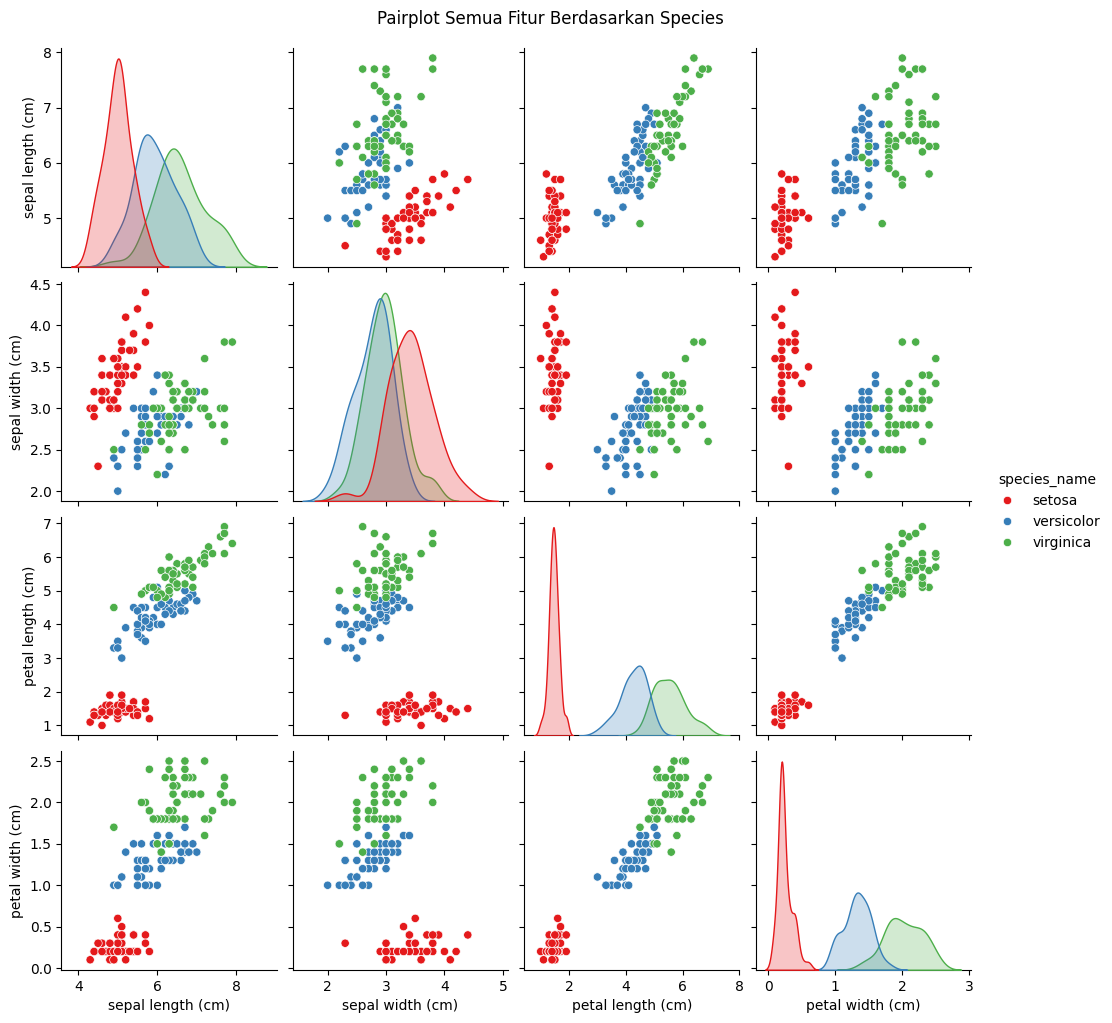

In [8]:
sns.pairplot(df, vars=numeric_cols, hue='species_name', palette='Set1')
plt.suptitle("Pairplot Semua Fitur Berdasarkan Species", y=1.02)
plt.show()

### **Analisis Pairplot :**

1. **Distribusi diagonal (histogram/KDE tiap fitur)**

- **Setosa (merah)** terlihat memiliki distribusi yang sangat berbeda dengan dua kelas lainnya, terutama pada petal length dan petal width.
- **Versicolor (biru)** dan **Virginica (hijau)** cenderung tumpang tindih, tetapi masih bisa dibedakan terutama lewat petal length dan petal width.
- **Sepal length** & **sepal width** tidak memberikan pemisahan yang jelas.

2. **Hubungan antar fitur (scatter antar variabel)**

- **Petal length** vs **petal width**: terlihat cluster sangat jelas. **Setosa** benar-benar terpisah, sedangkan **Versicolor** dan **Virginica** membentuk dua kelompok yang agak **overlap**.
- **Sepal length** vs **sepal width**: pemisahan antar kelas lebih sulit, banyak **overlap** antara **Versicolor** dan **Virginica**.
- **Sepal** vs *Petal* (kombinasi silang): Petal tetap memberikan pemisahan kelas lebih baik dibandingkan sepal.

### **Kesimpulan :**

- **Setosa** dapat dipisahkan dengan mudah dari dua kelas lainnya menggunakan fitur petal length dan petal width.
- **Versicolor** dan **Virginica** sulit dipisahkan hanya dengan sepal, tetapi pemisahan jadi lebih baik ketika menggunakan fitur petal.
- Secara keseluruhan, fitur petal (khususnya panjang dan lebar) memiliki informasi paling kuat untuk klasifikasi species iris.

## **8. Analisis Per Spesies**

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_18540\1706288467.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_18540\1706288467.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_18540\1706288467.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")


C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_18540\1706288467.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")


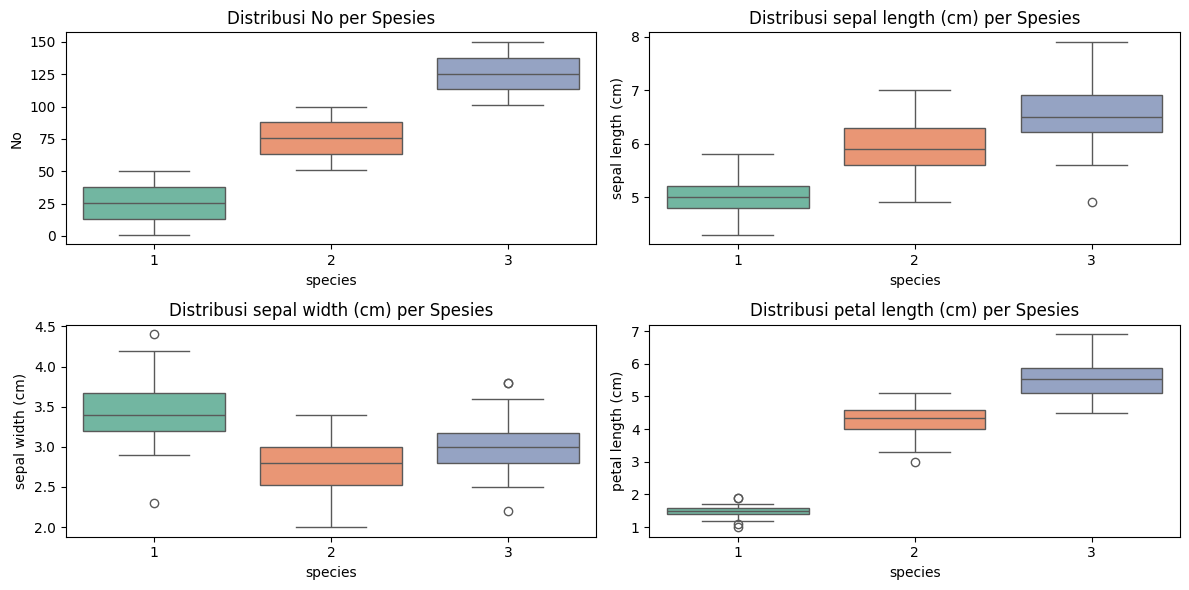

In [9]:
plt.figure(figsize=(12,6))
# Only plot the first 4 numeric columns
for i, col in enumerate(df.columns[:4], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x="species", y=col, data=df, palette="Set2")
    plt.title(f"Distribusi {col} per Spesies")
plt.tight_layout()
plt.show()

### **Analisis Boxplot per Spesies :**

1. **Distribusi Nomor (No)**

- Hanya penomoran urutan data, tidak relevan untuk analisis biologis.
- Namun jelas tiap spesies diurutkan: **Setosa** (1–50), **Versicolor** (51–100), **Virginica** (101–150).

2. **Sepal Length (cm)**

- **Setosa** (1) memiliki sepal length paling pendek dengan median sekitar 5 cm.
- **Versicolor** (2) lebih panjang, median sekitar 6 cm.
- **Virginica** (3) paling panjang, median sekitar 6.5–7 cm.
- Terdapat overlap antara **Versicolor** dan **Virginica**, sehingga pemisahan menggunakan fitur ini agak sulit.

3. **Sepal Width (cm)**

- **Setosa** memiliki sepal width paling besar (median sekitar 3.4 cm).
- **Versicolor** cenderung lebih kecil (median 2.8 cm).
- **Virginica** berada di tengah (median 3.0 cm).
- Beberapa **outlier** muncul di **ketiga** kelas, tetapi **sepal width** cukup membantu membedakan Setosa dengan yang lain.

4. **Petal Length (cm)**

- Fitur ini paling jelas memisahkan kelas:
    - **Setosa** sangat kecil (median 1.5 cm).
    - **Versicolor** sedang (median 4.2 cm).
    - **Virginica** besar (median 5.5 cm).
- Hampir tidak ada overlap antar spesies, sehingga petal length sangat baik untuk klasifikasi.

### **Kesimpulan :**

- **Sepal length**: membedakan Setosa dengan dua spesies lain, tapi Versicolor & Virginica overlap.
- **Sepal width**: membantu membedakan Setosa, tapi kurang kuat untuk Versicolor vs Virginica.
- **Petal length**: fitur paling diskriminatif, memisahkan ketiga spesies dengan sangat jelas.
- Secara umum, fitur **petal** lebih informatif dibandingkan **sepal** untuk klasifikasi spesies iris.

## **9. Deteksi Outlier**

In [10]:
num_cols = df.select_dtypes(include="number").columns

# Hitung IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Deteksi outlier
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | 
            (df[num_cols] > (Q3 + 1.5 * IQR)))

print("\n--- Jumlah Outlier per Kolom ---")
print(outliers.sum())

print("\n--- Persentase Outlier per Kolom ---")
print((outliers.sum() / len(df) * 100).round(2).astype(str) + " %")


--- Jumlah Outlier per Kolom ---
No                   0
sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

--- Persentase Outlier per Kolom ---
No                    0.0 %
sepal length (cm)     0.0 %
sepal width (cm)     2.67 %
petal length (cm)     0.0 %
petal width (cm)      0.0 %
species               0.0 %
dtype: object


In [11]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_data = df[(df[col] < lower) | (df[col] > upper)][[col, "species"]]
    
    print(f"\nOutlier pada {col}:")
    if not outlier_data.empty:
        print(outlier_data)
    else:
        print("Tidak ada outlier")


Outlier pada No:
Tidak ada outlier

Outlier pada sepal length (cm):
Tidak ada outlier

Outlier pada sepal width (cm):
    sepal width (cm)  species
15               4.4        1
32               4.1        1
33               4.2        1
60               2.0        2

Outlier pada petal length (cm):
Tidak ada outlier

Outlier pada petal width (cm):
Tidak ada outlier

Outlier pada species:
Tidak ada outlier


### **Penjelasan Outlier :**

1. **Kolom No**
Tidak ada outlier (normal, karena ini cuma nomor urut).

2. **Kolom sepal length (cm)**
Tidak ada nilai ekstrem → semua panjang sepal berada dalam rentang normal.

3. **Kolom sepal width (cm)**
Ada 4 outlier (≈2.67% dari total data):
- **4.4, 4.1, 4.2 (lebih tinggi dari normal → outlier atas)**
- **2.0 (lebih rendah dari normal → outlier bawah)**
Jadi distribusi sepal width agak menyebar lebih luas, dan ada beberapa bunga dengan sepal yang sangat lebar atau sangat sempit dibanding mayoritas.

4. **Kolom petal length (cm)**
Tidak ada outlier → data petal length cenderung stabil.

5. **Kolom petal width (cm)**
Tidak ada outlier → data petal width juga stabil.

6. **Kolom species**
Tidak ada outlier (ini kategori, jadi wajar).

### **Interpretasi**

- Hanya **sepal width** yang punya outlier → artinya variasi ukuran lebar sepal antar spesies cukup ekstrem.
Outlier ini bisa:
- Dipertahankan kalau memang mewakili kondisi nyata (misalnya bunga spesies tertentu memang lebih lebar dari yang lain).
- Dihapus jika tujuannya analisis statistik murni dan nilai ekstrem bisa mengganggu model (contoh regresi atau clustering).


## **10. Kesimpulan**

1. Dataset terdiri dari 150 baris data dan 5 kolom (4 numerik, 1 kategorikal).
2. Tidak ada missing value pada dataset.
3. Sepal length dan petal length menunjukkan korelasi yang cukup tinggi (~0.87).
4. Distribusi fitur berbeda cukup signifikan antar spesies:
   - Setosa punya petal kecil (pendek & sempit).
   - Versicolor berada di tengah.
   - Virginica punya petal lebih panjang & lebar.
5. Ditemukan beberapa outlier pada sepal width.
6. Secara umum dataset bersih, terstruktur, dan siap dipakai untuk analisis lebih lanjut (klasifikasi).


```{tableofcontents}
```